# Assignment 3

The purpose of this assignment is to experiment with various clustering algorithms.

## Imports

In [934]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Exploratory Data Analysis

array([[<AxesSubplot:xlabel='Alcohol', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Proline', ylabel='Alcohol'>,
        <AxesSubplot:xlabel='Ash_Alcanity', ylabel='Alcohol'>],
       [<AxesSubplot:xlabel='Alcohol', ylabel='Proline'>,
        <AxesSubplot:xlabel='Proline', ylabel='Proline'>,
        <AxesSubplot:xlabel='Ash_Alcanity', ylabel='Proline'>],
       [<AxesSubplot:xlabel='Alcohol', ylabel='Ash_Alcanity'>,
        <AxesSubplot:xlabel='Proline', ylabel='Ash_Alcanity'>,
        <AxesSubplot:xlabel='Ash_Alcanity', ylabel='Ash_Alcanity'>]],
      dtype=object)

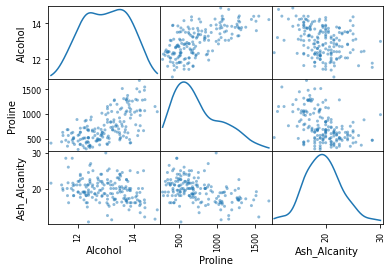

In [935]:
wine = pd.read_csv('../data/wine.csv')

scatter_matrix(wine[['Alcohol', 'Proline', 'Ash_Alcanity']], diagonal='kde')


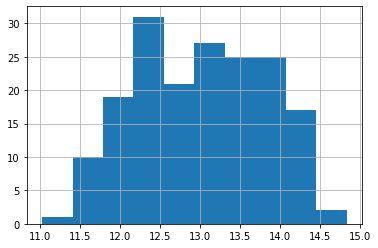

In [936]:
ax = wine['Alcohol'].hist()

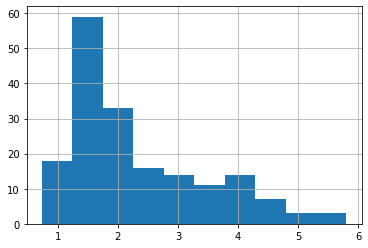

In [937]:
ax = wine['Malic_Acid'].hist()

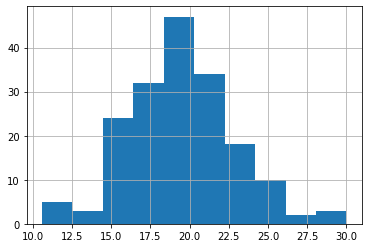

In [938]:
ax = wine['Ash_Alcanity'].hist()

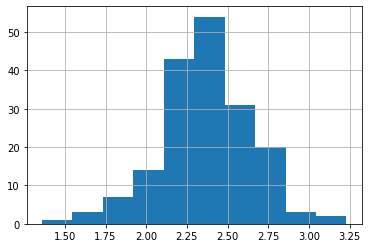

In [939]:
ax = wine['Ash'].hist()

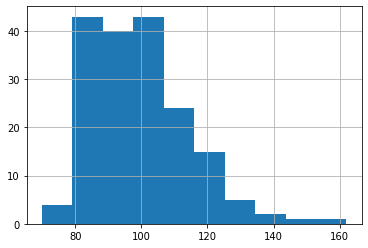

In [940]:
ax = wine['Magnesium'].hist()

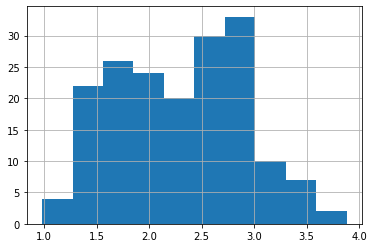

In [941]:
ax = wine['Total_Phenols'].hist()

## Data Preprocessing

This section preprocessed the data including normalizing the data and using skews

### Normalization

In [942]:
def min_max(data):
    result = (data - data.min()) / (data.max() - data.min())
    return result

def zscore(data):
    result = (data - data.mean()) / data.std()
    return result

def decimal(data):
    digits = len(str(abs(data.max())))
    result = (data / 10**digits)
    return result

# Normalize the fields that produce a better skew
wine.Magnesium = min_max(wine.Magnesium)
wine.Color_Intensity = min_max(wine.Color_Intensity)

### Skews

In [943]:
def calc_skew(data):
    skew = (3 * (np.mean(data) - np.median(data))) / np.std(data)
    print(skew)

col = 'Alcohol'

natlog = np.log(wine[col])
invsqrt = (1 / np.sqrt(wine[col]))
sqrt = np.sqrt(wine[col])

print('Normal Skew:')
calc_skew(wine[col])
print('\nNat Log Skew:')
calc_skew(natlog)
print('\nInverse Sqrt Skew:')
calc_skew(invsqrt)
print('\nSqrt Skew:')
calc_skew(sqrt)

Normal Skew:
-0.18299964678464478

Nat Log Skew:
-0.27528482275952953

Inverse Sqrt Skew:
0.3209542456596994

Sqrt Skew:
-0.22927077159320647


In [944]:
# Re-adjust skews
wine.Ash = np.sqrt(wine.Ash)
wine.Malic_Acid = (1 / np.sqrt(wine.Malic_Acid))
wine.Magnesium = np.sqrt(wine.Magnesium)
wine.Nonflavanoid_Phenols = np.log(wine.Nonflavanoid_Phenols)
wine.Proanthocyanins = np.sqrt(wine.Proanthocyanins)
wine.Color_Intensity = np.sqrt(wine.Color_Intensity)
wine.Proline = np.log(wine.Proline)

# Normalize the data with min-max that hasn't already been normalized
wine.Alcohol = min_max(wine.Alcohol)
wine.Ash = min_max(wine.Ash)
wine.Ash_Alcanity = min_max(wine.Ash_Alcanity)
wine.Flavanoids = min_max(wine.Flavanoids)
wine.Hue = min_max(wine.Hue)
wine.Malic_Acid = min_max(wine.Malic_Acid)
wine.Nonflavanoid_Phenols = min_max(wine.Nonflavanoid_Phenols)
wine.OD280 = min_max(wine.OD280)
wine.Proanthocyanins = min_max(wine.Proanthocyanins)
wine.Proline = min_max(wine.Proline)
wine.Total_Phenols = min_max(wine.Total_Phenols)

wine

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.467704,0.622245,0.257732,0.787125,0.627586,0.573840,0.472243,0.697379,0.609929,0.455285,0.970696,0.746616
1,0.571053,0.447380,0.470158,0.030928,0.571040,0.575862,0.510549,0.426629,0.392289,0.514301,0.463415,0.780220,0.738731
2,0.560526,0.315447,0.741365,0.412371,0.580480,0.627586,0.611814,0.514707,0.827618,0.612721,0.447154,0.695971,0.805967
3,0.878947,0.402660,0.657574,0.319588,0.683660,0.989655,0.664557,0.377363,0.667987,0.745865,0.308943,0.798535,0.929540
4,0.581579,0.275868,0.836596,0.536082,0.722315,0.627586,0.495781,0.676192,0.566204,0.509299,0.455285,0.608059,0.540460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.007328,0.632391,0.510309,0.521286,0.241379,0.056962,0.853259,0.310959,0.740123,0.130081,0.172161,0.544229
174,0.623684,0.121103,0.647531,0.639175,0.589768,0.282759,0.086498,0.736288,0.437076,0.716695,0.178862,0.106227,0.551691
175,0.589474,0.091189,0.534268,0.484536,0.737210,0.210345,0.073840,0.736288,0.416674,0.872406,0.089431,0.106227,0.611370
176,0.563158,0.275868,0.591557,0.484536,0.737210,0.231034,0.071730,0.864983,0.453749,0.827224,0.097561,0.128205,0.614689
